# 파이썬 4강: 데이터 가공과 시각화

- 목표: `Pandas`를 이용한 데이터 가공과 `Seaborn` 을 이용한 통계 그래프

# II부: `Seaborn` 을 이용한 데이터 시각화 

<img src="figure/snu_ui_download.png" width="100"/>

### 서울대학교 통계학과 김지수 교수

# 0. seaborn 라이브러리

![](figure/seaborn.png)

- `matplotlib`에 기반한 **데이터 시각화 도구**
- **통계 그래픽**에 특화되어 있음
    + 변수의 분포와 변수들간의 연관 관계 시각화
   

In [1]:
# 다음과 같이 seaborn 라이브러리를 이명 sns로 로드한다.
import seaborn as sns

# 다음의 라이브러리는 데이터를 다루기 위해 같이 로드한다. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 0.1 맛보기 

### 0.1.1. seaborn에 저장된 데이터


In [2]:
# Seaborn 데이터셋 목록
# sns.get_dataset_names() 

#### `penguins` 데이터

남극 팔머군도의 펭귄들에 대한 데이터 

In [2]:
# 데이터셋 불러오기
penguins = sns.load_dataset('penguins')
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [4]:
penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

### 0.1.2 연속형 변수의 분포 조사 

Q: 팔머 군도 펭귄의 날개 길이는 얼마나 길까? 

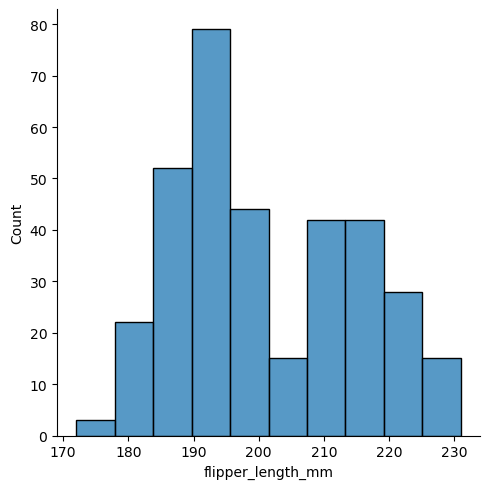

In [ ]:
sns.displot(data=penguins, x="flipper_length_mm")

### 0.1.3 두 변수의 관계

Q: 팔머 군도 펭귄의 날개 길이가 길면 부리 길이도 길까? 

C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


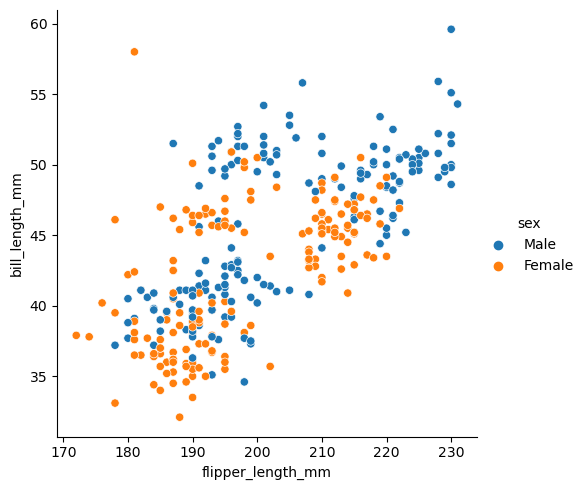

In [5]:
sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="sex")


### 0.1.4 범주형 변수의 값에 따른 분포 조사


Q: 팔머 군도 펭귄의 날개 길이는 펭귄의 종과 암수에 따라 다를까? 

C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


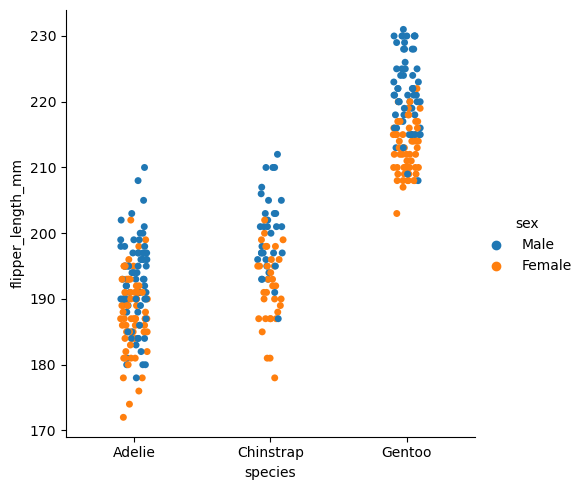

In [6]:
sns.catplot(x='species', y='flipper_length_mm', hue="sex", data=penguins)

### 0.1.5 seaborn에서 제공하는 통계 그래프의 종류

1. 두 (수치형) 변수의 **관계(relation)** (`relplot`)
2. 한 변수 (또는 두 변수)의 **분포(distribution)** (`displot`)
3. **범주형(categorical)** 변수의 값에 따른 수치형 변수의 조건부 분포 (`catplot`)
4. **회귀분석(regression analysis)**과 관련된 그래프 (`regplot`, `lmplot`)
5. 의미에 따라 나누어진 여러 개의 플롯 (`FacetGrid`) 

> 수업에서는 1,2,3번을 다룸. 
>
> 4,5번은 수업자료 참조. 

### 0.1.6 Figure-level 함수 vs axes-level 함수 

![](figure/function_overview_8_0.png)
 

- `Seaborn` 패키지는 분석하는 데이터의 구조에 따라서 크게 세가지(관계형, 분포형, 범주형)으로 나눠서 패키지를 제공하고 있다. 이외에 회귀, 행렬 데이터를 그려주는 함수들도 포함되어 있다.  
- 상위 레벨에 쓰여 있는 함수들은 **Figure-level**함수(고수준), 하위 레벨에 쓰여 있는 함수들은  **axes-level**함수(저수준)로 불린다.
    - "고수준"은 사용자가 디테일한 수준까지 설정할필요없이, 몇가지 설정으로만 사용할 수 있다는 것이다. 쉽게얘기하면, 그래프를 조금 더 쉽게 그려주는 페키지이다.
    - "저수준"은 디테일한 수준까지 고려할 수 있음을 의미한다.     
- **Figure-level** 함수의 `kind` 옵션에 해당 함수의 **axes-level**의 이름을 넣어 동일한 플롯을 그릴 수 있다. 다음은 히스토그램을 `histplot`과 `displot`으로 각각 실행한 결과이다. (`displot`함수에서 `kind`옵션에 아무것도 입력하지 않으면, 히스토그램의 결과를 보여준다.) 

- 다음의 두 코드는 (거의) 같은 결과를 준다. 

Figure-level: `sns.displot(data=penguins, x="flipper_length_mm", hue="species", kind = 'hist')`

Axes-level: `sns.histplot(data=penguins, x="flipper_length_mm", hue='species', multiple="stack")`

- figure-level 함수의 유용한 점 중 하나는, subplots를 손쉽게 생성할 수 있다는 점이다. 예를 들어, 위의 그래프처럼 세가지 분포를 쌓아서 보여주지 않고, 각각 분리해서 보여주려면 `col` 옵션에 해당 변수를 입력해서 다음처럼 나타낼 수 있다. 

`sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species")`

C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


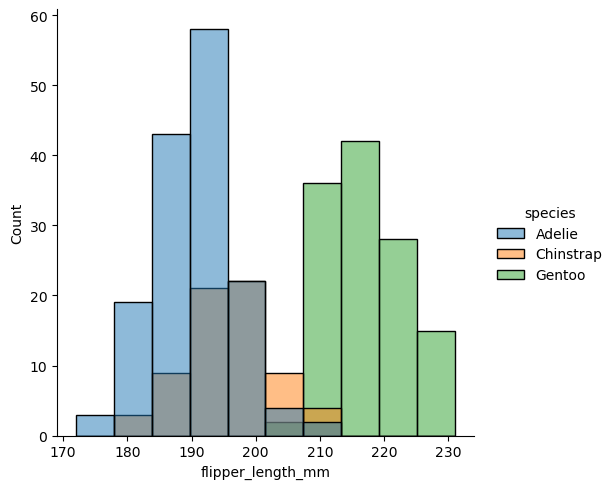

In [7]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", kind='hist')

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

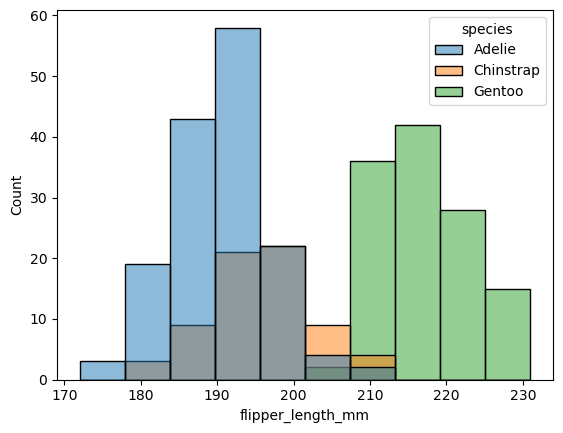

In [8]:
sns.histplot(data=penguins, x="flipper_length_mm", hue='species')

C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


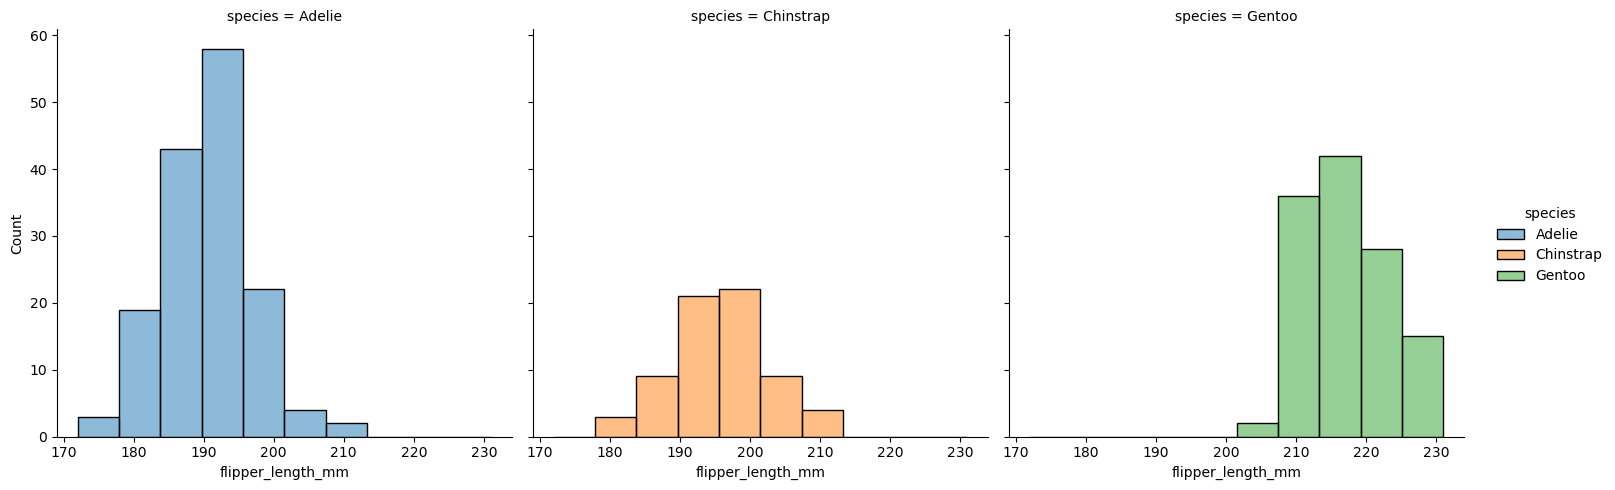

In [9]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col='species')

- Axes-level 함수로 생성한 그래프는 `matplotlib` 패키지들의 그래프와 호환됨. 

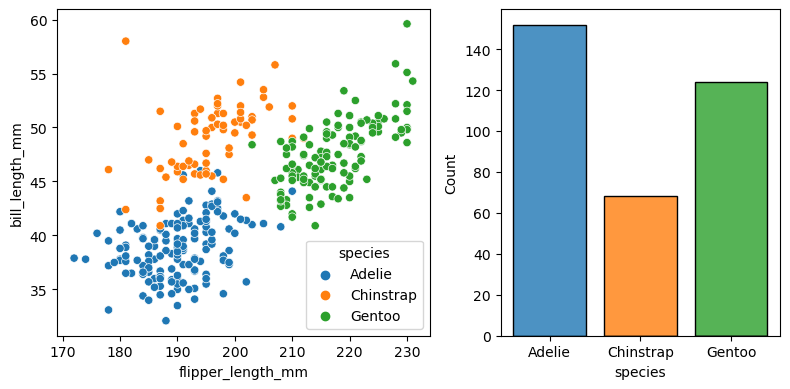

In [10]:
# 예: matplotlib의 subplots로 생성한 두 axes에 각각 다른 그래프 포함 가능
# 아래에서 sns.histplot 대신 sns.displot 사용 불가
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()


## 0.2 데이터 그래픽

#### 데이터 그래픽의 네 가지 요소

 - 데이터 그래픽은 정보의 전달을 목적에 두고 있음
 - 다음 네 가지 요소를 통해 효율적인 정보 전달을 제고 
 
1. visual cues (정보의 시각적 단서): 정보가 어떤 형태로 전달되나? 
2. coordinate system (그래프의 바탕축): 정보가 어떤 바탕에 표현되어야 하는가?
3. scale (크기)
4. context (문맥) 



![](figure/taxo.png)

### 0.2.1 Visual cues 

![](figure/Lec4-cue9.PNG)



- 색 scale의 선택도 중요함

![](figure/fig2_11.jpg)

출처: MDSR

- 여러 Visual Cues를 사용하여 여러 변수의 값을 전달

### 0.2.2 Coordinate system

- x-y 좌표축이 일반적


### 0.2.3 Scale 

- 수치형 변수: 선형 스케일, 로그 스케일, 또는 퍼센트 스케일 또는 표준화 스케일
- 범주형 변수: 순서가 있을 때는 순서에 맞게 배치

- 수치형 변수라도 범주화를 통해 범주형 변수로 만드는 것이 정보 전달에 용이할 때가 있음

![](figure/catcut.png)


### 0.2.4 context 

문맥 제공을 위해

- 제목 
- 축의 이름과 스케일
- 범례 (참조) 

예제: 다음 그림에는 몇 개의 변수값이 포함되었는가? 

C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


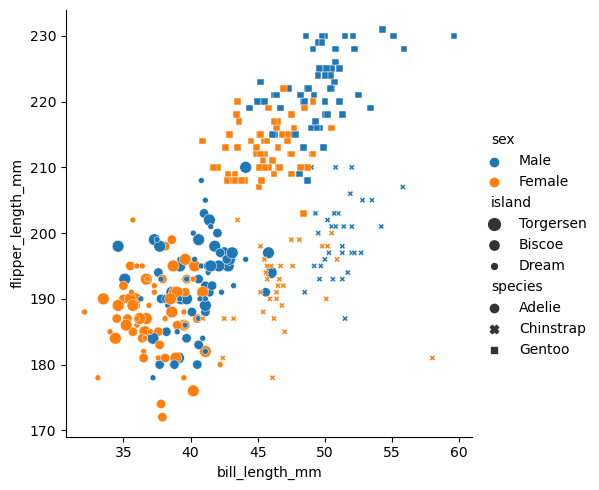

In [11]:
 sns.relplot(x='bill_length_mm', y='flipper_length_mm', hue="sex", style='species', 
             size='island', data=penguins)

 >답: 
 >
 >수치형 변수 둘: `bill_length_mm`, `flipper_length_mm`
 > 
 >범주형 변수 셋: `sex`, `species`, `island`

# 1. 통계적 관계 시각화 (Relational)

- 두 수치형 변수 데이터의 통계적 관계 시각화 (산점도): `sns.relplot()`
    - 두 수치형 변수의 visual cues: 점을 표현하는 두 `x`, `y` 좌표
    - 추가적인 변수의 정보를 색, 크기, 점의 모양으로 표현
    - 추가변수가 범주형인 경우: 점의 모양(`style`) 또는 색(`hue`)으로 다름을 표현
    - 추가변수가 수치형인 경우: 크기 (`size`) 또는 색(`hue`)으로 값의 크기를 표현 

- 문법: 
`sns.relplot( 
    x= 첫번째 수치형 변수명,
    y=  두번째 수치형 변수명,
    hue= 추가변수명,
    size= 추가변수명,
    style= 추가변수명,
    data= DataFrame 이름 ,
)`

#### 예 1: penguins 데이터에서 `flipper_length_mm`과 `bill_length_mm`의 관계 파악 

In [12]:
penguins.head(1)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   

   body_mass_g   sex  
0       3750.0  Male

C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


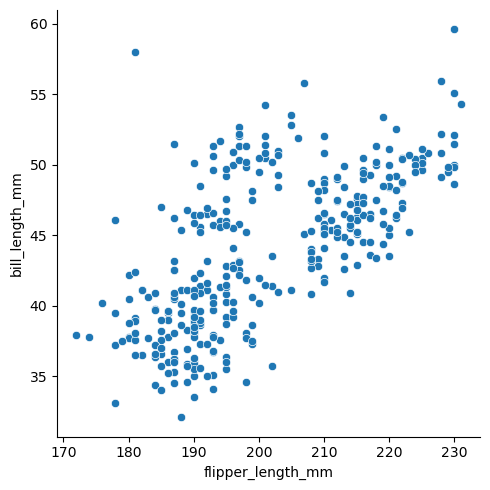

In [13]:
sns.relplot(data=penguins, x='flipper_length_mm', y='bill_length_mm')

#### 연습

1. `penguins` 데이터에서 `flipper_length_mm`과 `bill_length_mm`의 관계를 파악하는 산점도를 그려라. 
2. 1번의 산점도에 종(`species`)과 암수(`sex`) 정보를 추가하라. 
3. 1번의 산점도에 몸무게(`body_mass_g`)의 정보를 추가하라. 

C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


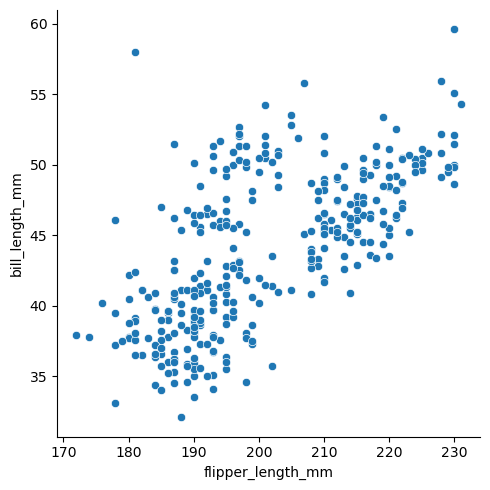

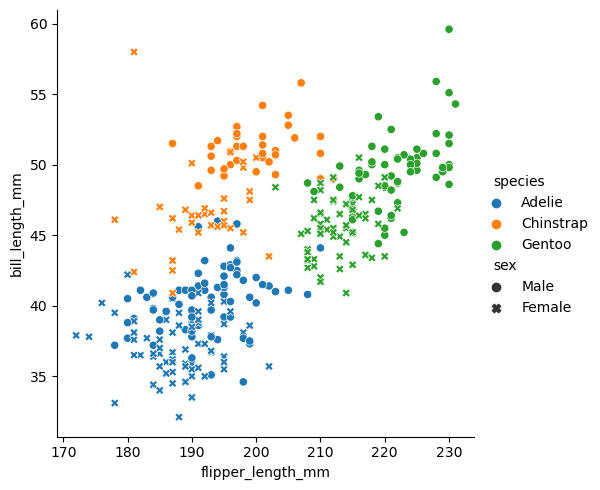

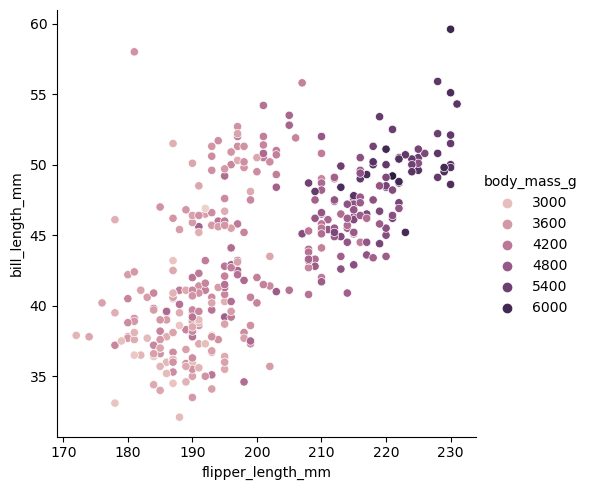

In [14]:
# 연습 1
sns.relplot(data = penguins, x = 'flipper_length_mm', y = 'bill_length_mm')

# 연습 2 
sns.relplot(data = penguins, x = 'flipper_length_mm', y = 'bill_length_mm',
           hue = 'species', style = 'sex')

# 연습 3 
sns.relplot(data = penguins, x = 'flipper_length_mm', y = 'bill_length_mm',
            hue = 'body_mass_g')

## 1.1 산점도를 그리는 axes-level 함수: `scatterplot()`


<Axes: xlabel='flipper_length_mm', ylabel='bill_length_mm'>

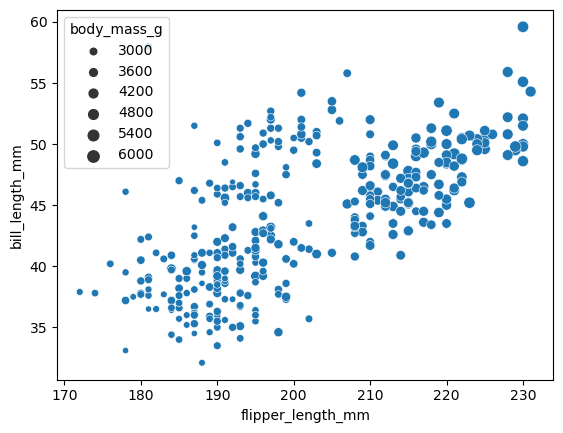

In [15]:
sns.scatterplot(data=penguins, x='flipper_length_mm', y='bill_length_mm',
            size='body_mass_g')

 ## 1.2 범주형 변수의 값에 따라 panel 생성
 
 - 너무 많은 정보가 한 figure에 포함되면 읽기 어려움 
 - 어떤 범주형 변수 (예, `sex`)의 값에 따라 두 수치형 변수의 관계를 가로로 (`col` 또는 column별로) 또는 세로로 (`row` 또는 row별로) 따로 그린다. 
 
 예: 펭귄 데이터에서 두 수치형 변수 (x,y)의 관계 (또는 분포)를 암컷 또는 수컷인지에 따라 나누어 그린다. 

C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


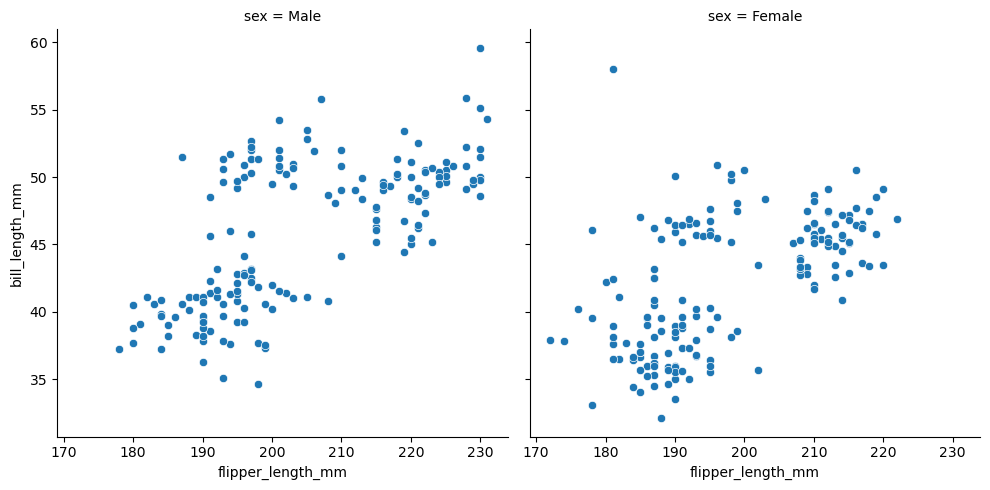

In [16]:
sns.relplot(data=penguins, x='flipper_length_mm', y='bill_length_mm',
            col='sex')

#### 연습 

1. `penguins` 데이터에서 `flipper_length_mm`과 `bill_length_mm`의 관계를 펭귄들이 사는 섬 (`island`)과 암수 (`sex`) 여부에 따라 따로 표현하라. 가로는 암수를, 세로는 섬을 나타낸다. 

2. 1번의 그림에 `species`와 `body_mass_g`의 정보를 추가하라. 

C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


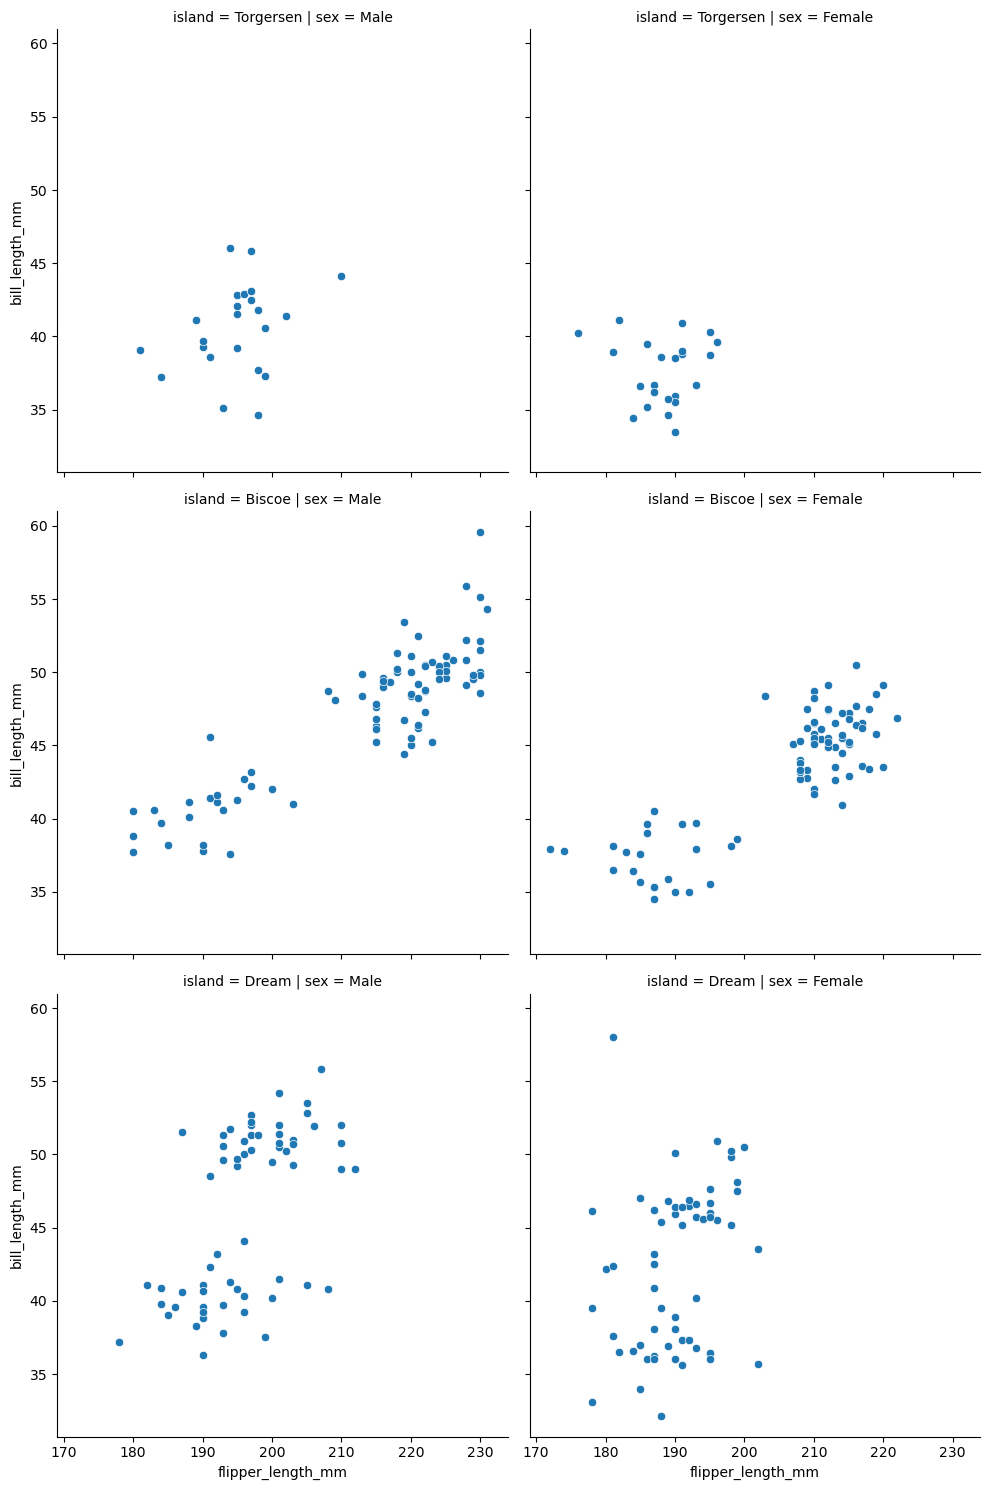

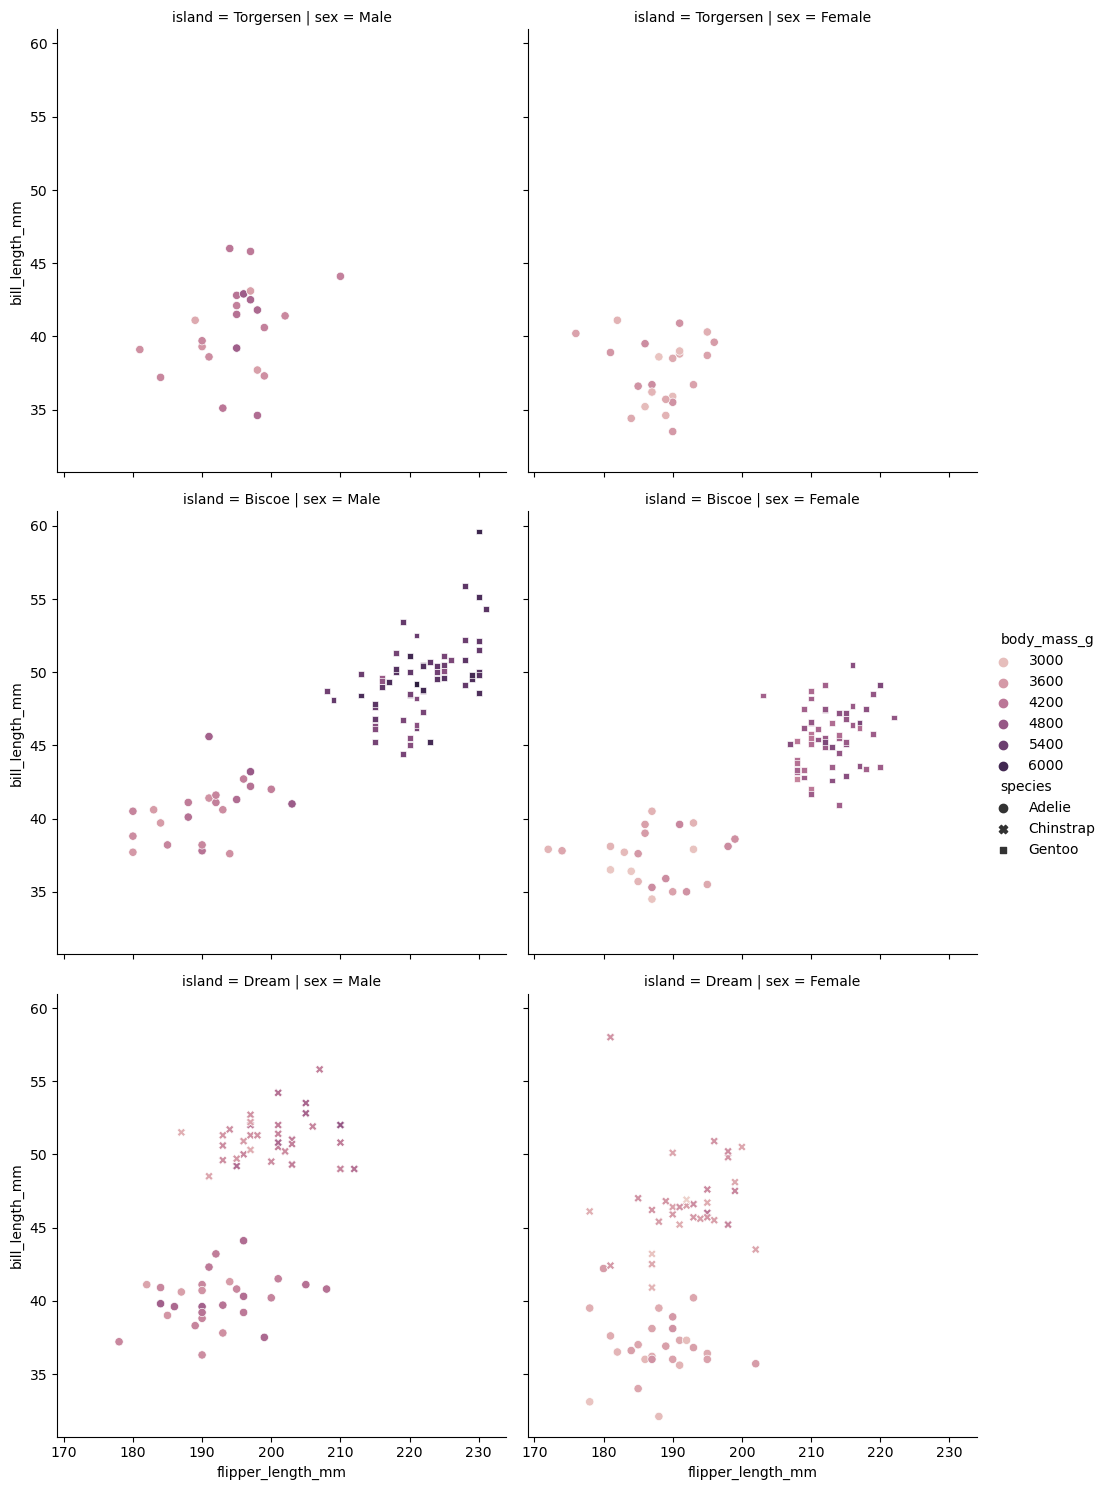

In [17]:
# 연습 1 
sns.relplot(data=penguins, x='flipper_length_mm', y='bill_length_mm', 
            col='sex', row='island')

# 연습 2
sns.relplot(data=penguins, x='flipper_length_mm', y='bill_length_mm',
           col='sex', row='island', hue='body_mass_g', style='species')

## 1.3 추세의 시각화

- 산점도에서 `x`변수의 값이 증가함에 따라 `y`변수의 값의 변화하는 추세를 표현하기 위해 선을 이용.
- 시간에 따라 변하는 값 (주가지수, 인구수 등)을 표현하기 위해서는 점보다 선이 더 좋음. 
- 이를 위해 그림의 종류가 선 (`sns.relplot(... , kind='line', ...)`)임을 명시한다. 

C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


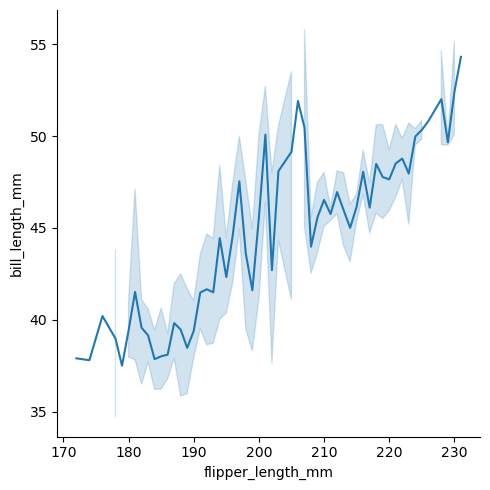

In [18]:
sns.relplot(data=penguins, x='flipper_length_mm', y='bill_length_mm',
           kind='line')

In [19]:
# sns.relplot(x='flipper_length_mm', y='body_mass_g', data=penguins, kind="line", ci="sd")
# sns.relplot(x='flipper_length_mm', y='body_mass_g', data=penguins, kind="line", estimator=None)

### 1.3.1 두 번째 예제 데이터: Gapminder 

- 세계 여러 나라에 대한 데이터
- 한스 로슬링의 https://www.gapminder.org/
- 데이터는 R의 gapminder 패키지(를 카피한 Python의 gapminder 패키지)
- 설치 방법: pip install gapminder

In [20]:
from gapminder import gapminder
gapminder.head()

country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106

#### 연습

1. `gapminder` 데이터에서 한국 ('country == "Korea, Rep."')만을 골라낸 뒤, 연도와 인구 수, 국내총생산만을 선택한 DataFrame을 만들어, `gapminder_kr`에 저장하라.

2. `gapminder_kr` 데이터에서 year 와 pop의 관계를 시각화하라. `relplot()`을 이용하며, `kind = 'line'`을 명시하라. 



C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


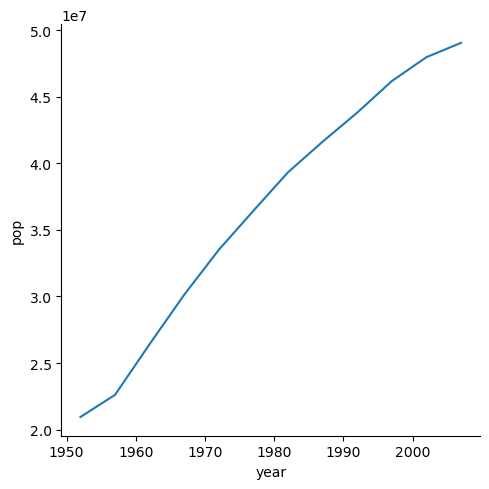

In [21]:
# 연습 1 
gapminder_kr = (gapminder.
                query('country == "Korea, Rep."').
                filter(['year', 'pop', 'gdpPercap'])
               )
gapminder_kr

# 연습 2
sns.relplot(data=gapminder_kr, 
            x='year',
            y='pop',
            kind='line')

## 1.4 선 그래프를 그리는 axes-level 함수: `lineplot()`


<Axes: xlabel='year', ylabel='pop'>

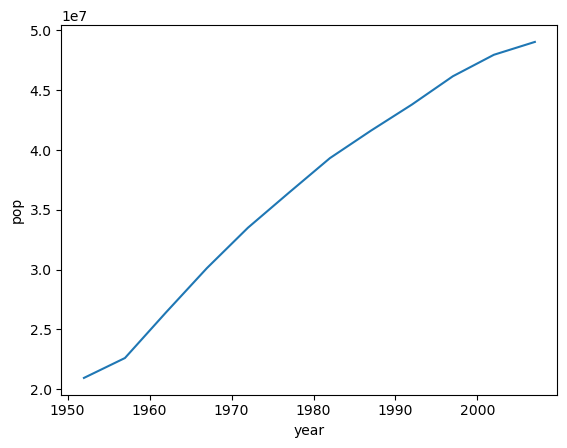

In [22]:
sns.lineplot(data=gapminder_kr, x='year', y='pop')

# 2. 데이터의 분포 시각화 (distributional)

- 한 수치형 변수(`x`)의 분포: 히스토그램(`hist`), 밀도함수(`kde`), 누적분포함수(`ecdf`)

- 두 수치형 변수(`x`,`y`)의 분포: (2차원) 히스토그램, (2차원) 밀도함수

- 분포의 시각화: `sns.displot()`
    - 범주형 변수의 값에 따른 분포 조사 가능 `hue`, `col`, `row` 등의 옵션 이용

- 문법: 
`sns.displot( 
    x= 첫번째 수치형 변수명,
    y= (두번째 수치형 변수명)
    hue= 추가변수명
    row, col= faceting 할 범주형 변수명
    data= DataFrame 이름,
    kind= {"hist", "kde", "ecdf"} 중 하나
)`

#### 예제

1. 펭귄데이터에서 수치형 변수 `flipper_length_mm`의 분포 파악
    - `sns.displot(data=penguins, x='flipper_length_mm')`
    - `sns.displot(data=penguins, x='flipper_length_mm', hue='species')`
    - `sns.displot(data=penguins, x='flipper_length_mm', hue='species', kind='kde')`
    
2. 펭귄데이터에서 두 수치형 변수 `flipper_length_mm`와 `body_mass_g`의 분포 파악
    - `sns.displot(data=penguins, x='flipper_length_mm', y='body_mass_g')`


C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\r

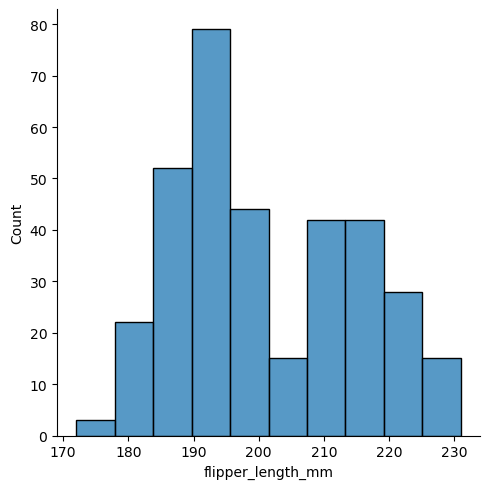

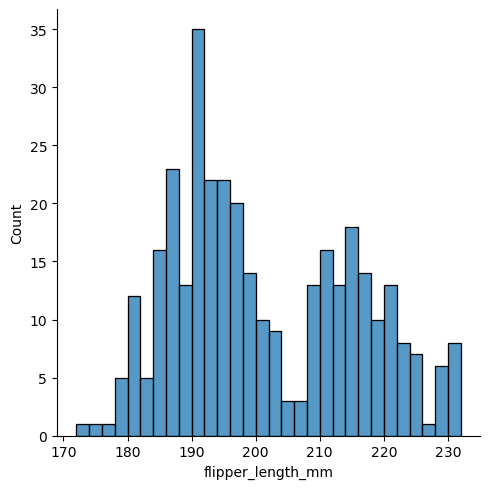

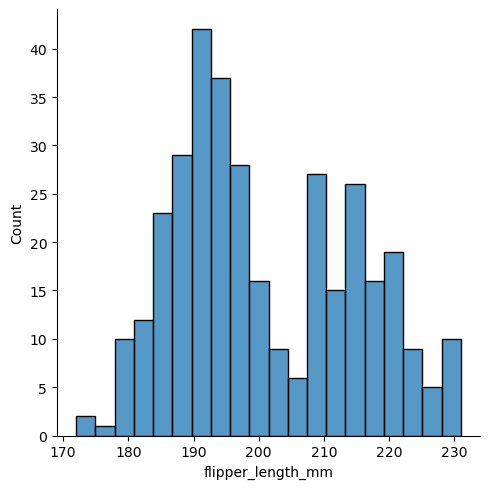

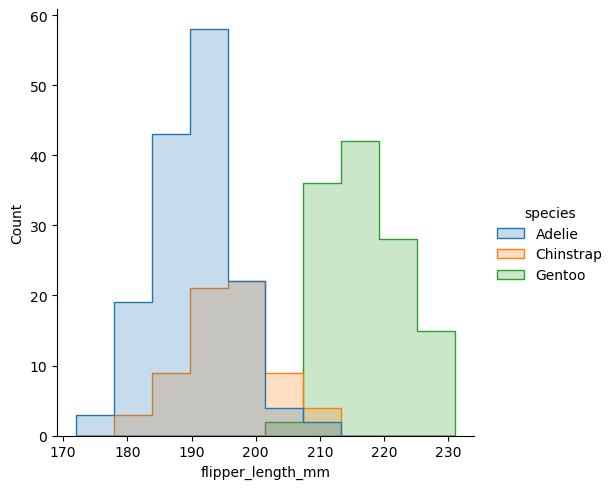

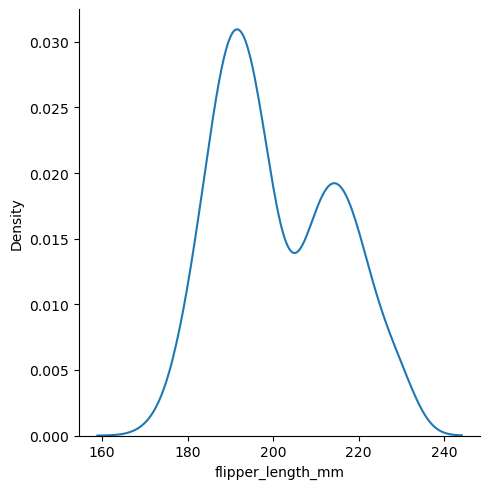

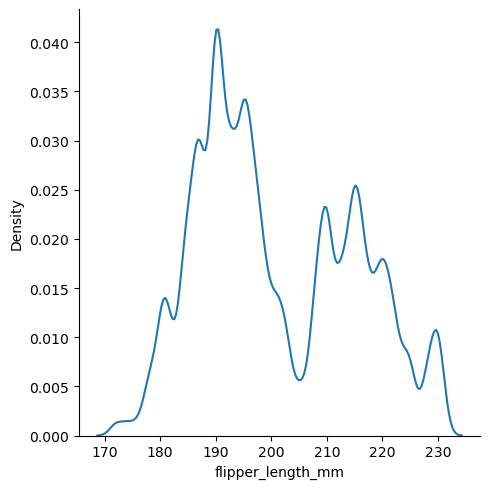

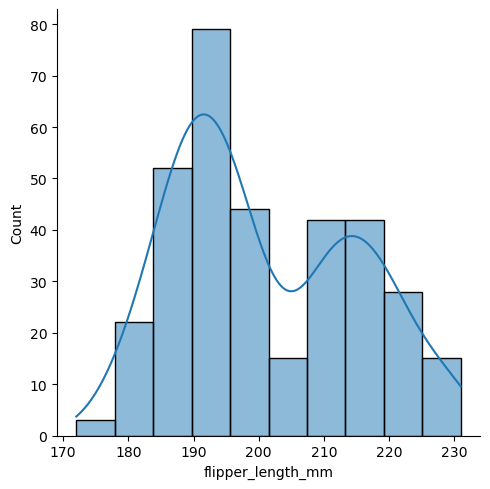

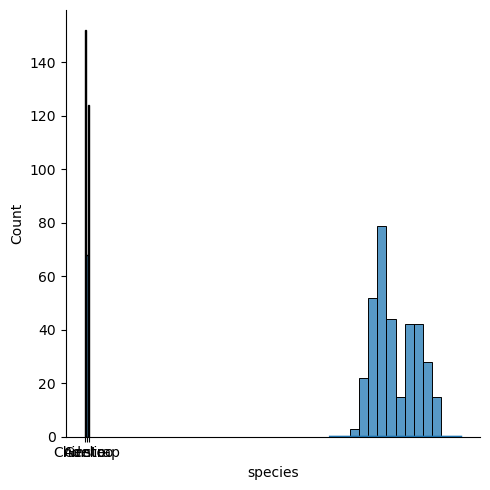

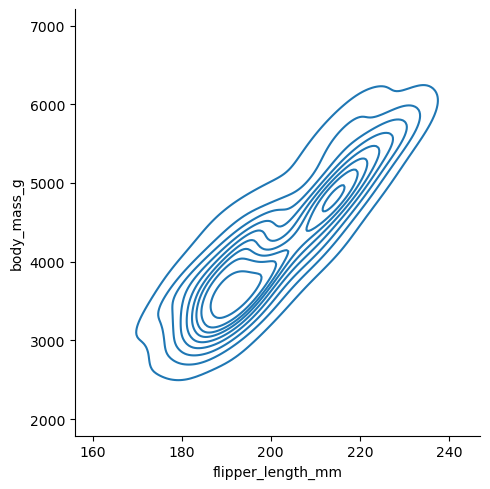

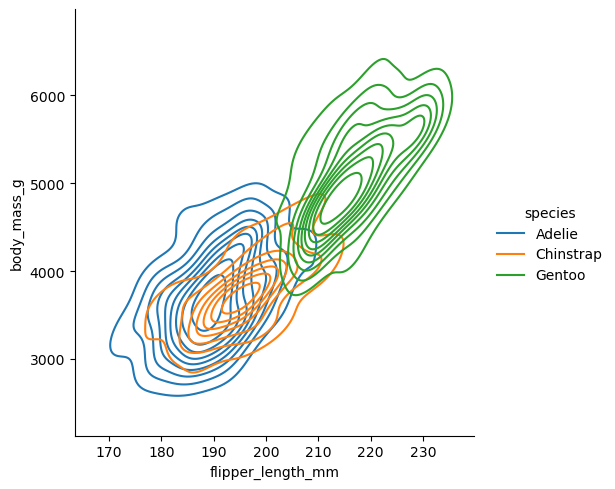

In [23]:
# 기본 히스토그램 
sns.displot(data=penguins, x='flipper_length_mm')

# 히스토그램의 빈 갯수 또는 빈 크기 조정 
sns.displot(data=penguins, x='flipper_length_mm', binwidth=2)
sns.displot(data=penguins, x='flipper_length_mm', bins=20)

# 범주형 변수의 값에 따른 조건부 분포
sns.displot(penguins, x="flipper_length_mm", hue="species", element="step") 

# 밀도함수 (kde) 
sns.displot(data=penguins, x='flipper_length_mm', kind='kde')
sns.displot(data=penguins, x='flipper_length_mm', kind='kde', bw_adjust=1/4)

# 동시에 그리기
sns.displot(data=penguins, x='flipper_length_mm', kde=True)

# 카테고리 데이터에 대한 플롯도 displot으로 그릴 수 있다.
sns.displot(penguins, x="species") 

# Axes-level 함수 이용
sns.histplot(data=penguins, x='flipper_length_mm')
sns.kdeplot(data=penguins, x='flipper_length_mm')

# 두 변수의 분포 시각화 ( 히스토그램보다는 밀도함수 시각화가 더 효율적)
sns.displot(data=penguins, x='flipper_length_mm', y='body_mass_g', kind='kde')
sns.displot(data=penguins, x='flipper_length_mm', y='body_mass_g', kind='kde', hue='species')


## 2.1 여러 변수의 분포

- `sns.jointplot()`: 두 변수의 결합분포와 각각의 분포를 동시에 시각화 (자동)
- `sns.JointGrid()`: 두 변수의 결합분포와 각각의 분포를 시각화할 수 있는 틀 (수동) 
- `sns.pairplot()`: 여러 수치형 변수의 쌍별 (pair-wise) 결합분포를 시각화 (자동) 
- `sns.PairGrid()`: 여러 수치형 변수의 쌍별 (pair-wise) 결합분포를 시각화 (수동) 

예제 참조. 

C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


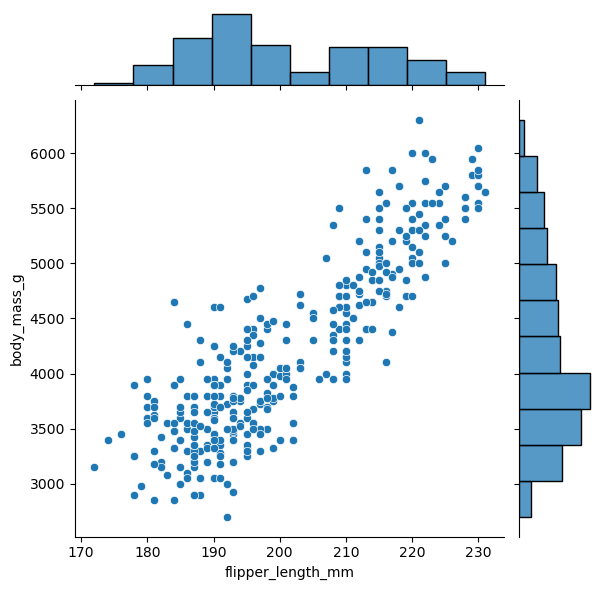

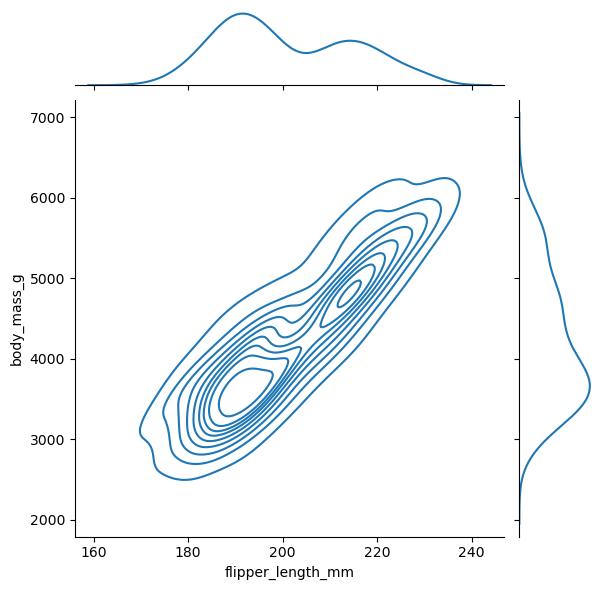

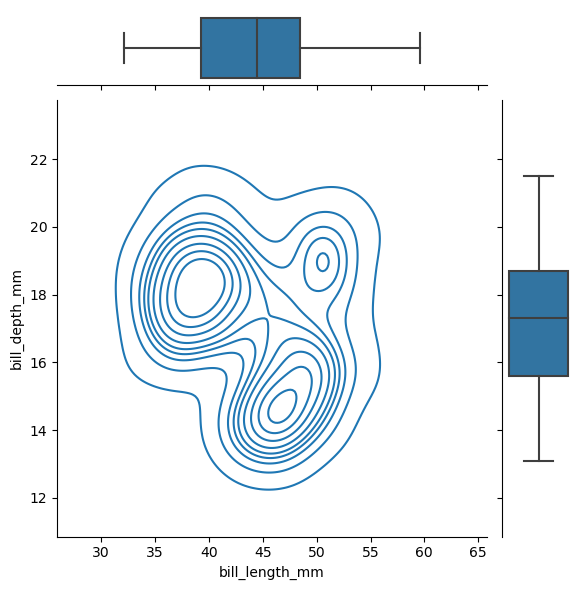

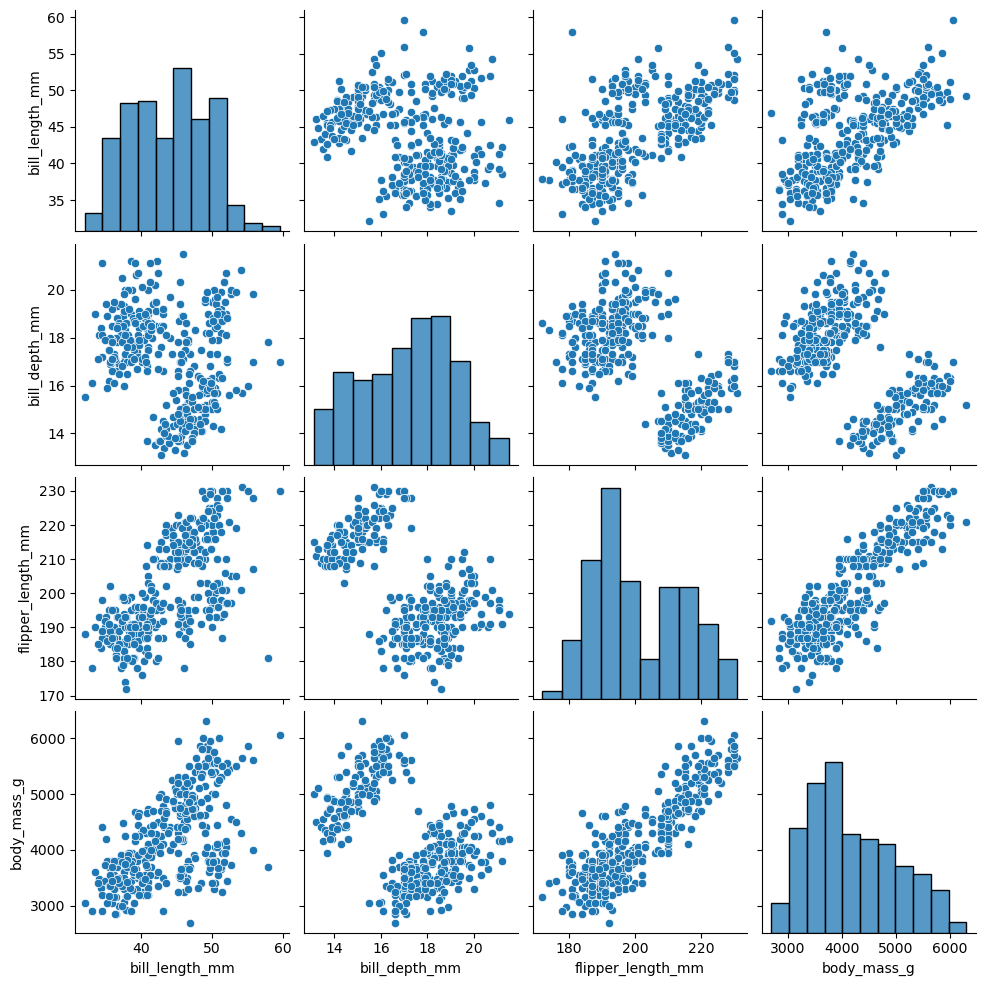

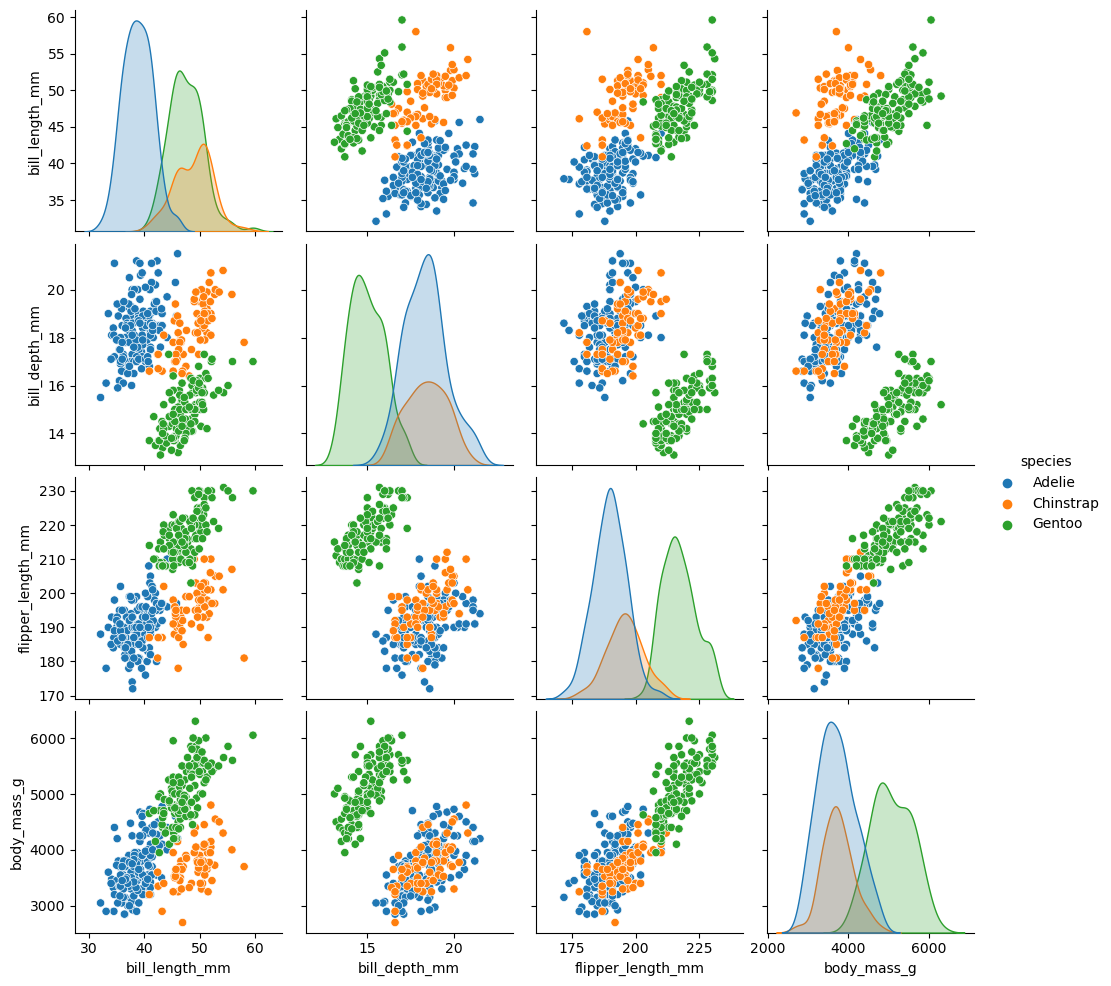

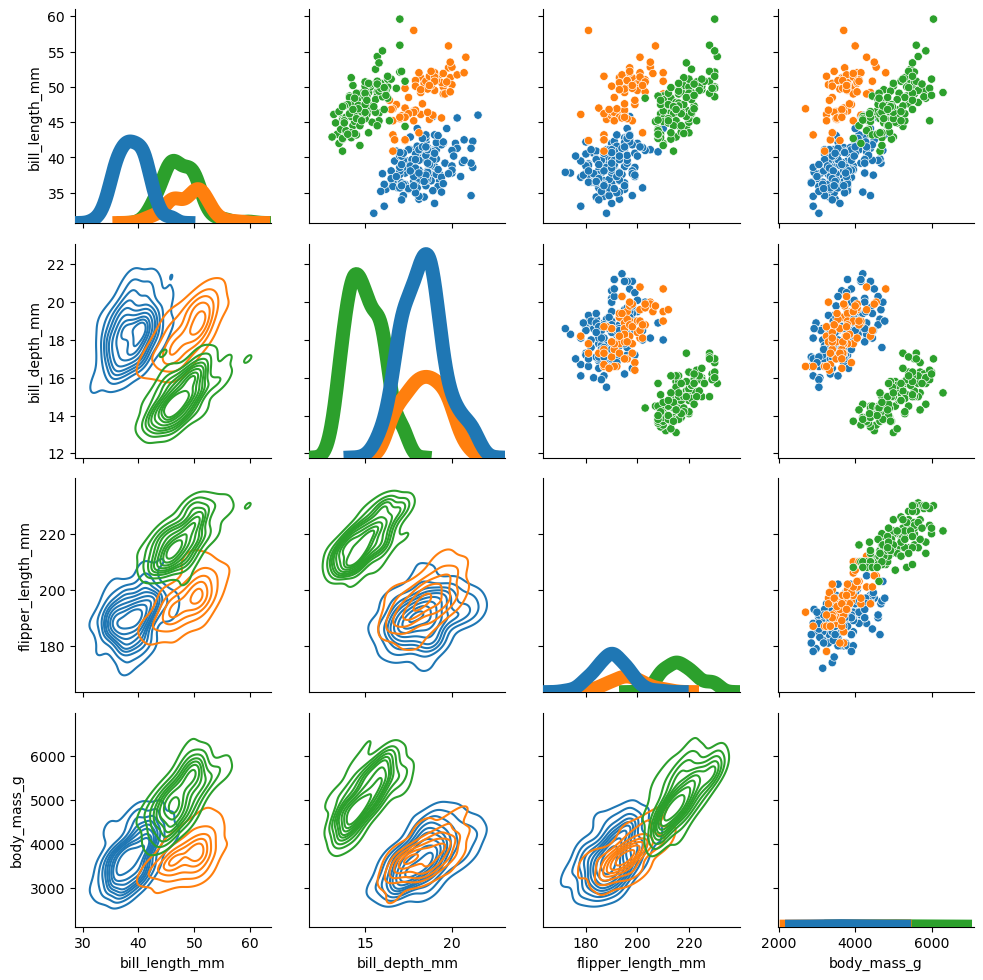

In [24]:
# jointplot 예제
sns.jointplot(data=penguins, x='flipper_length_mm', y='body_mass_g')
sns.jointplot(data=penguins, x='flipper_length_mm', y='body_mass_g', kind='kde')

# jointGrid 예제
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.kdeplot)
g.plot_marginals(sns.boxplot)

# pairplot 예제
sns.pairplot(data=penguins)
sns.pairplot(penguins, hue='species')

# PairGrid 예제
g = sns.PairGrid(penguins, hue='species')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=10) #lw: lineweight (선굵기)

#### 연습 

1. `gapminder` 데이터에서 2007년 (`year == 2007`)만을 골라낸 뒤, 인구수(`pop`)와 국내총생산(`gdpPercap`)의 분포를 `displot` 또는 `relplot`을 이용하여 표시하라.

2. 인구수가 구별이 되지 않는다면, 인구수를 로그변환하여 시각화하라. 

3. 2번에 이어, 이번에는 대륙별 분포가 다른지를 조사하고자 한다. `jointplot`을 이용하여 대륙별 인구수와 국내총생산의 분포를 표시하라. 

4. `pairplot`을 이용하여 평균수명 (`lifeExp`), 인구수, 국내총생산의 분포를 대륙별로 표시하라. 

C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


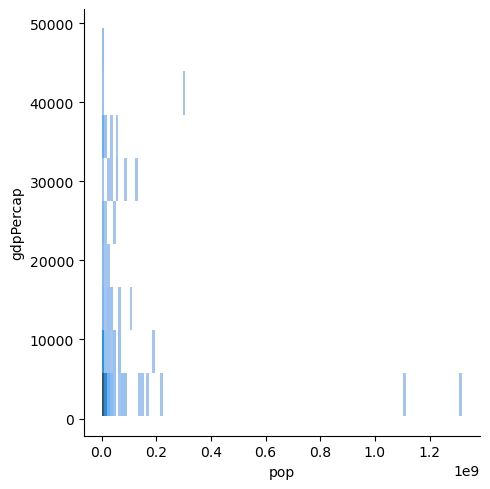

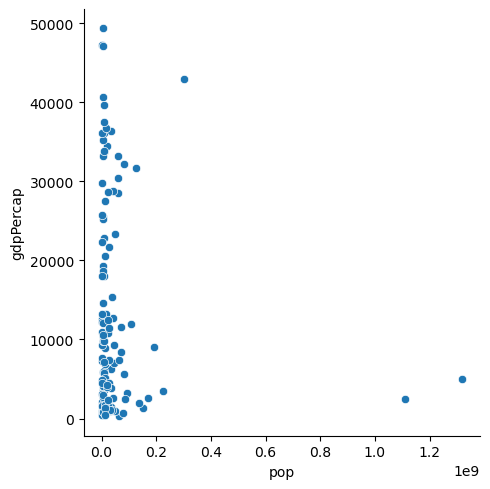

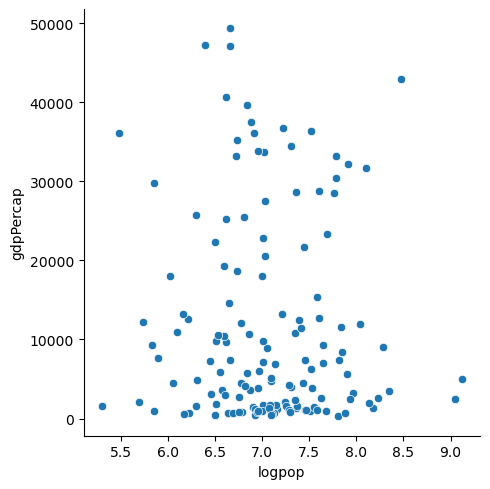

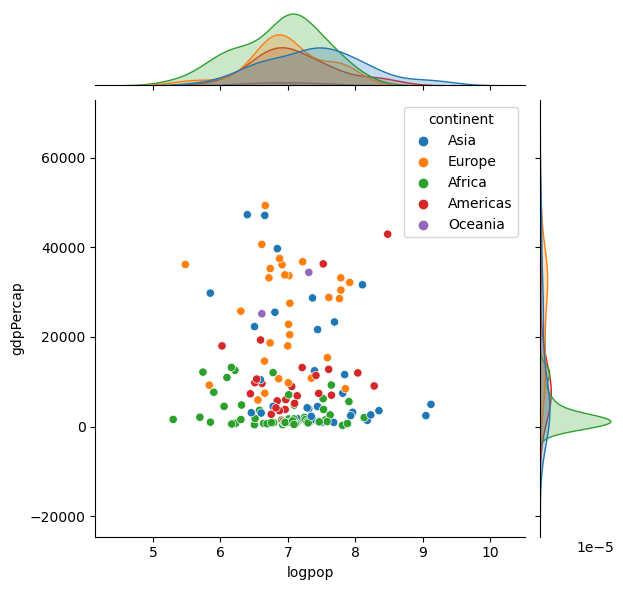

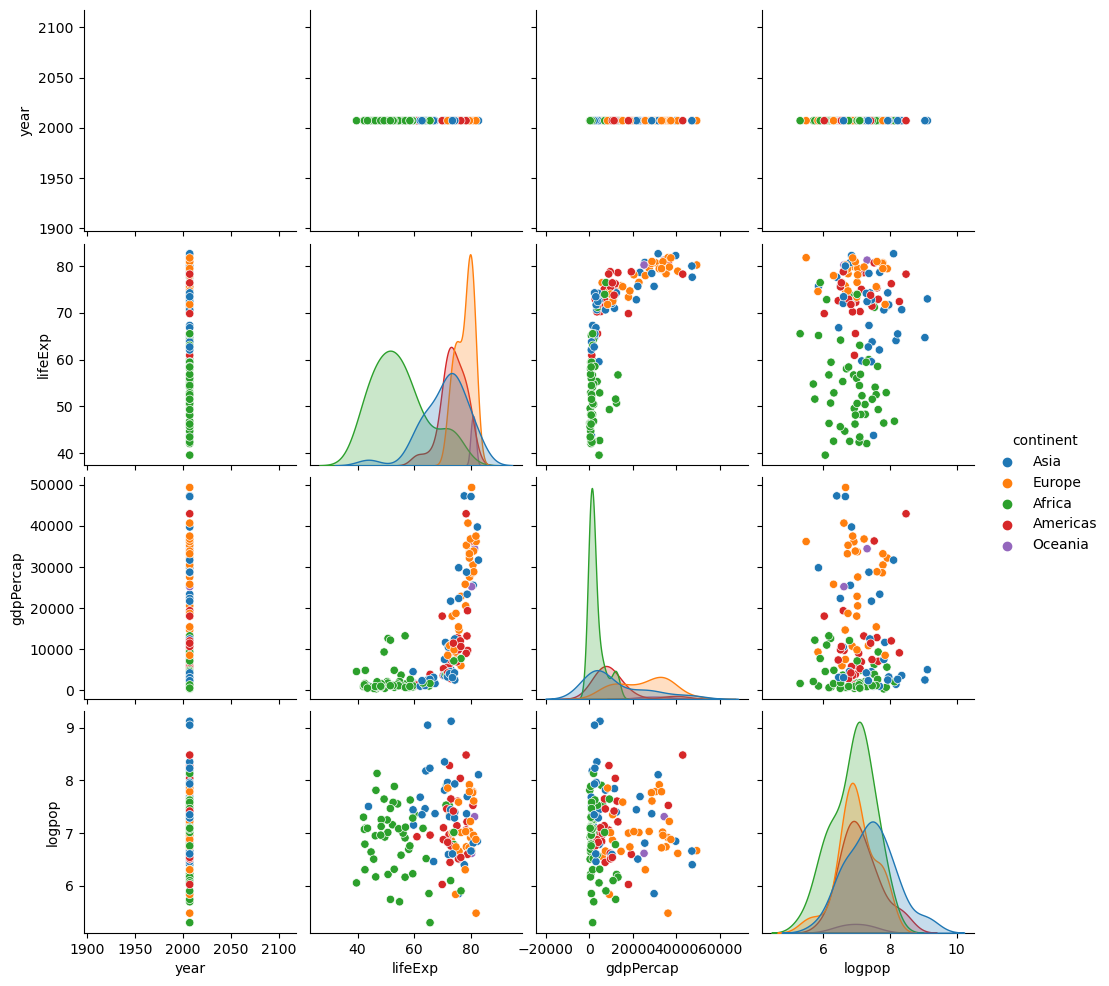

In [25]:
# 연습 1 
gm2007 = gapminder.query('year == 2007')
gm2007.head(2)
sns.displot(data=gm2007, x='pop', y='gdpPercap')
sns.relplot(data=gm2007, x='pop', y='gdpPercap')

# 연습 2 
gm2007_log = gm2007.assign(logpop=np.log10(gm2007['pop'])).drop(columns='pop')
sns.relplot(data=gm2007_log, x='logpop', y='gdpPercap')

# 연습 3 
sns.jointplot(data=gm2007_log, x='logpop', y='gdpPercap', hue='continent')

# 연습 4
sns.pairplot(data=gm2007_log, hue='continent')

# 3. 범주형 변수의 값에 따른 수치형 변수의 조건부 분포 (categorical)

범주형 변수의 값에 따른 수치형 변수의 조건부 분포를 시각화 하는 다양한 방법이 있다. 먼저, 이를 크게 3가지로 분류할 수 있는데 이는 다음과 같다. 

각 종류에 대해 해당하는 axes-level 함수명과 그에 대응되는 figure-level 함수 `catplot`의 `kind` 옵션이다.

- Categorical scatterplots:  
    - `stripplot()` : (with `kind="strip"`; 디폴트)
    - `swarmplot()` : (with `kind="swarm"`)  
    
- Categorical distribution plots:  
    - `boxplot()` : (with `kind="box"`)  
    - `violinplot()` : (with `kind="violin"`)  
    
- Categorical estimate plots:
    - `pointplot()` : (with `kind="point"`)  
    - `barplot()` : (with `kind="bar"`)  
    - `countplot()` : (with `kind="count"`)  



 문법: `sns.catplot( 
  x= 조건을 줄 범주형 변수명 ,
  y= 조건에 따라 요약할 수치형 변수,
  hue= 추가 조건을 줄 범주형 변수명 
  row, col= faceting 할 범주형 변수명
  data= DataFrame 이름,
  kind= 위의 여러 선택 중 하나
)`

# 3-1. Categorical scatterplots

C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


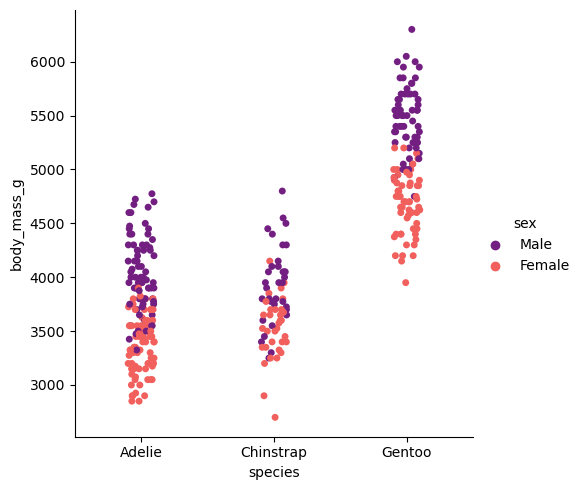

In [26]:
# stripplot 
sns.catplot(x='species', y='body_mass_g', hue="sex", data=penguins, palette='magma')

C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


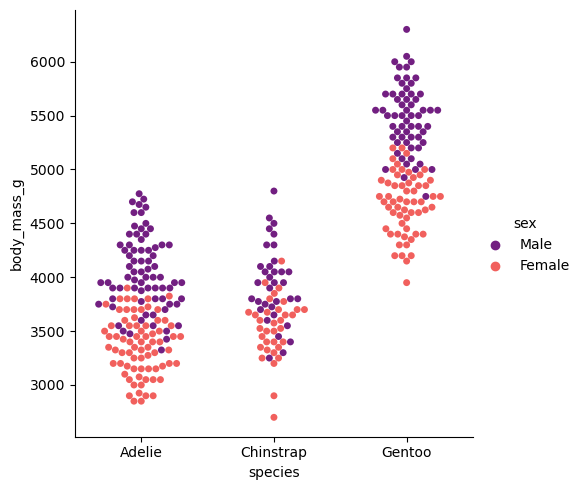

In [27]:
# swarmplot
sns.catplot(x='species', y='body_mass_g', hue="sex", data=penguins, palette='magma', kind="swarm")

C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


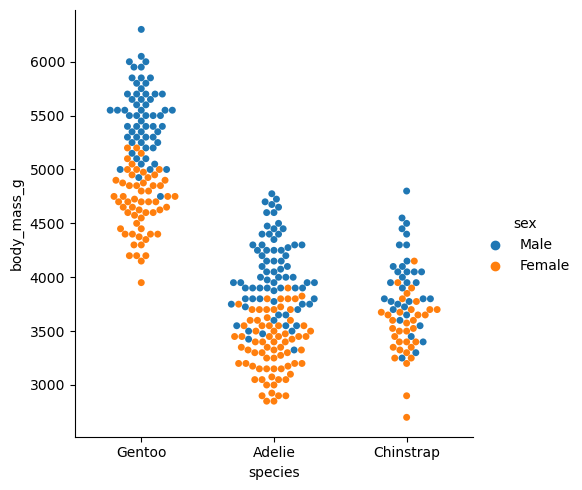

In [28]:
# 범주의 순서를 바꿀 수 있음
sns.catplot(x='species', y='body_mass_g', order=['Gentoo', 'Adelie','Chinstrap'], hue="sex", 
            data=penguins, kind='swarm')

# 3-2. Categorical distribution plots

C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


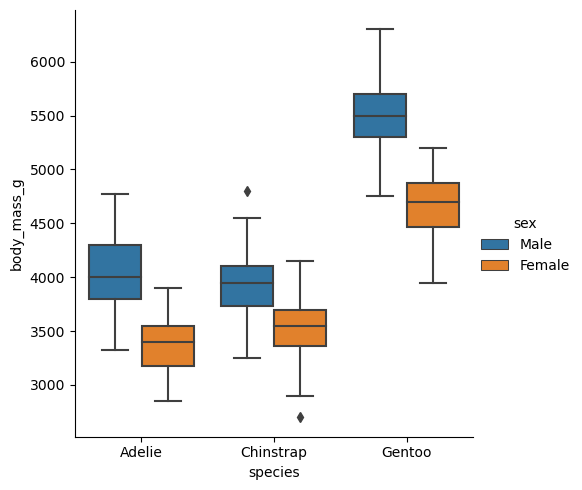

In [29]:
# boxplot 
sns.catplot(x='species', y='body_mass_g', hue="sex", data=penguins, kind='box')

C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


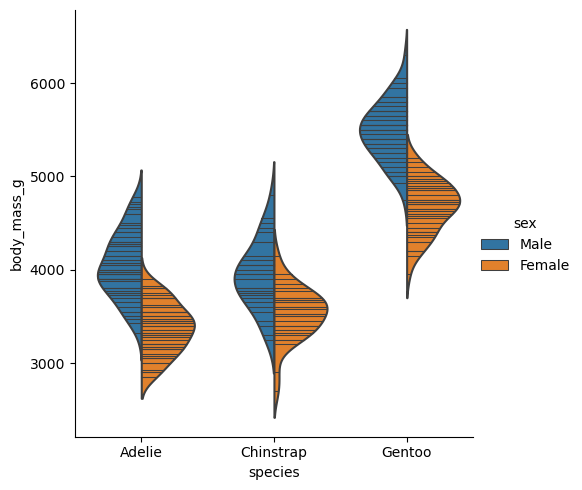

In [30]:
# violinplot
sns.catplot(x='species', y='body_mass_g', data=penguins, hue='sex', split=True, kind="violin", inner="stick")

<Axes: xlabel='species', ylabel='body_mass_g'>

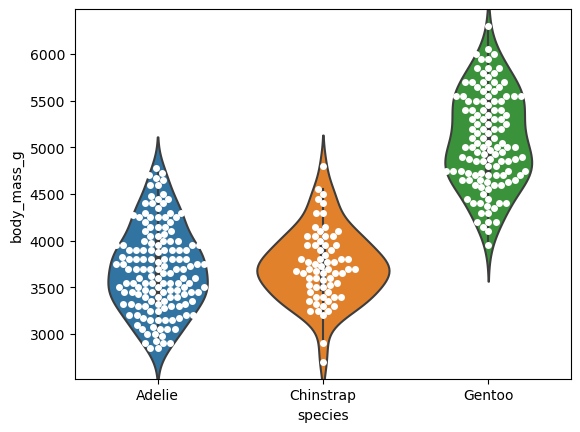

In [31]:
# axes-level 함수들을 이용하면 두 가지 그림을 겹쳐 그리는 것도 가능함
sns.violinplot(x='species', y='body_mass_g', data=penguins)
sns.swarmplot(x='species', y='body_mass_g', data=penguins, color='white')

# 3-3. Statistical estimation within categories

C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


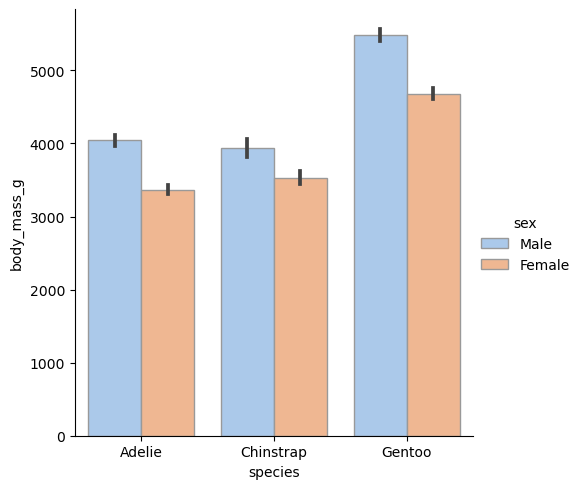

In [32]:
# 범주형 변수의 값별 평균 (barplot)
# 종과 성별에 따른 무게의 평균
sns.catplot(x='species', y='body_mass_g', hue="sex", data=penguins, kind='bar', 
            palette="pastel", edgecolor=".6")

C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


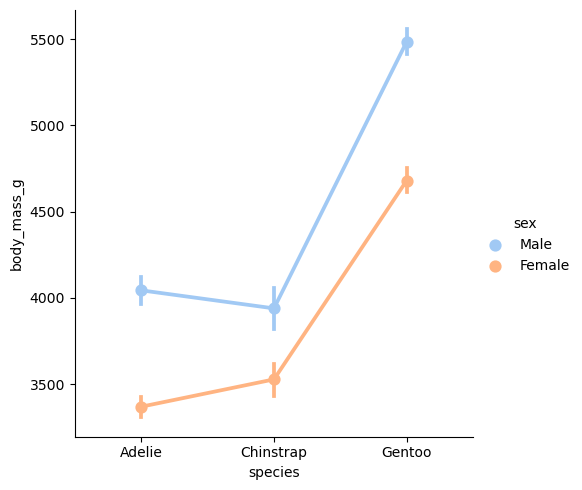

In [33]:
# 범주형 변수의 값별 평균 (pointplot)
# 종과 성별에 따른 무게의 평균
sns.catplot(x='species', y='body_mass_g', hue="sex", palette="pastel",
            data=penguins, kind='point')


C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


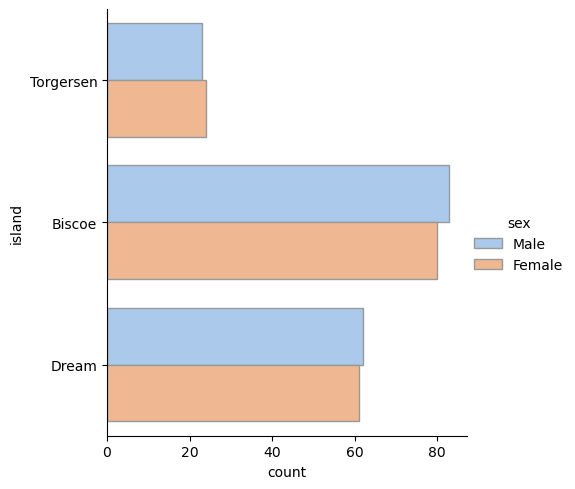

In [34]:
# 범주형 변수의 각 별 관측값의 개수 (countplot) 
# 종과 성별에 따른 관측값의 개수
sns.catplot(y='island', hue="sex", data=penguins, kind='count', 
            palette="pastel", edgecolor=".6")
# x 대신 y 축의 변수를 지정하여 가로의 막대그래프를 얻음

# II부: seaborn 을 이용한 데이터 시각화 끝

# 파이썬 4강: 데이터 가공과 시각화 끝


# 부록 

# 4. 회귀 직선의 시각화


- 회귀직선의 시각화를 위해서 `regplot()` 과 `lmplot()` 함수가 제공된다. 

<Axes: xlabel='flipper_length_mm', ylabel='bill_length_mm'>

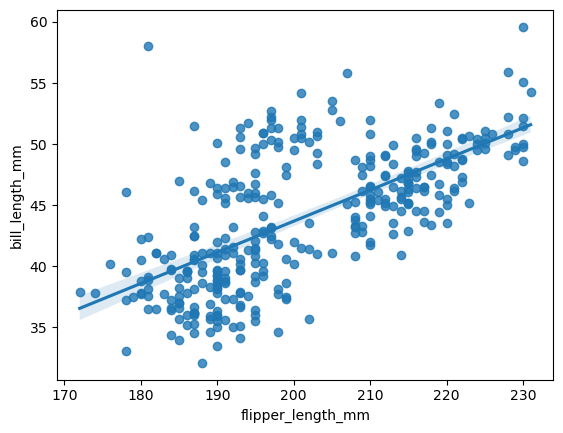

In [35]:
sns.regplot(x='flipper_length_mm', y='bill_length_mm', data=penguins)

C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


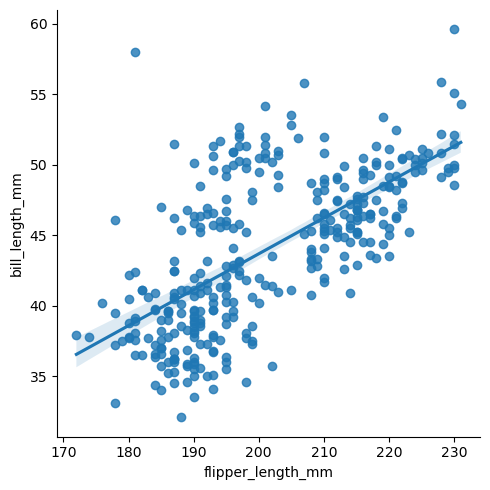

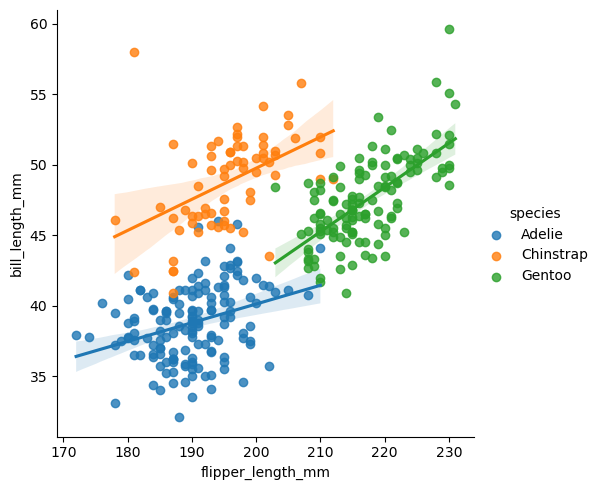

In [36]:
sns.lmplot(x='flipper_length_mm', y='bill_length_mm', data=penguins)
sns.lmplot(x='flipper_length_mm', y='bill_length_mm', data=penguins, hue='species')

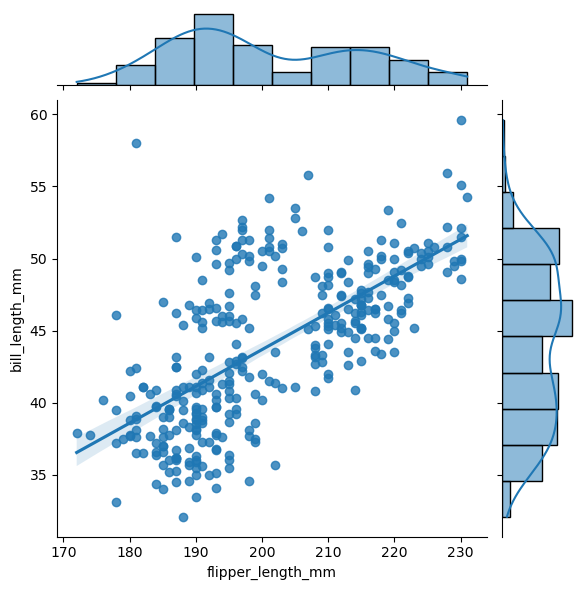

In [37]:
sns.jointplot(x='flipper_length_mm', y='bill_length_mm', data=penguins, kind="reg")

C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


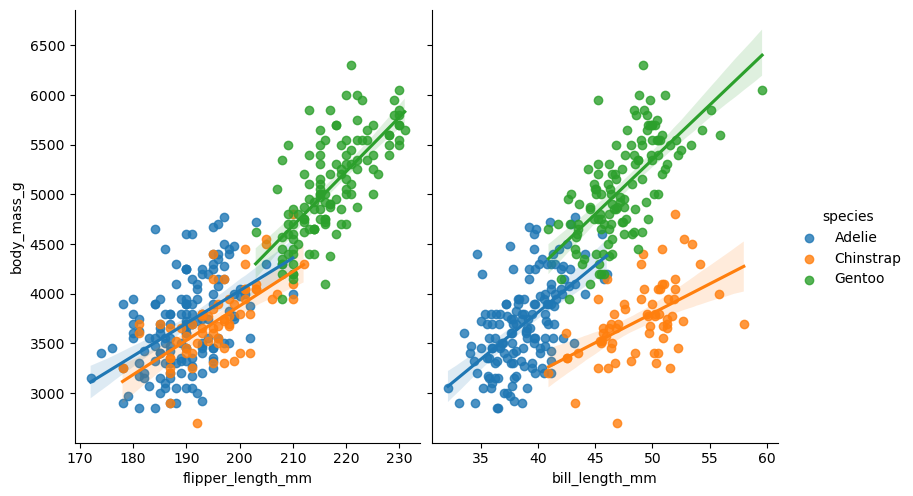

In [38]:
sns.pairplot(penguins, x_vars=["flipper_length_mm", "bill_length_mm"], y_vars=["body_mass_g"],
             hue="species", height=5, aspect=.8, kind="reg");

# 5. Multi-plot grids (FacetGrid)

C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


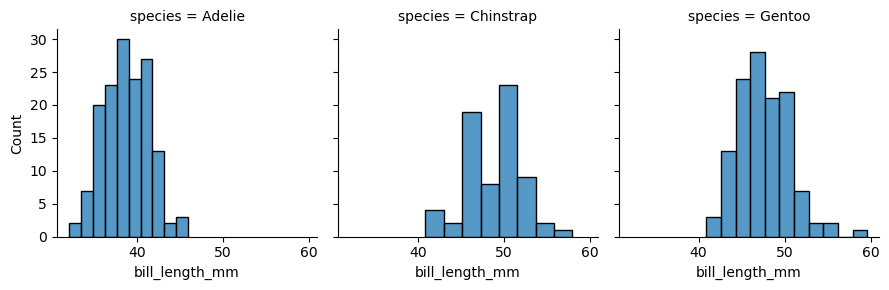

In [39]:
g = sns.FacetGrid(penguins, col="species")
g.map(sns.histplot, "bill_length_mm")
plt.show()

C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


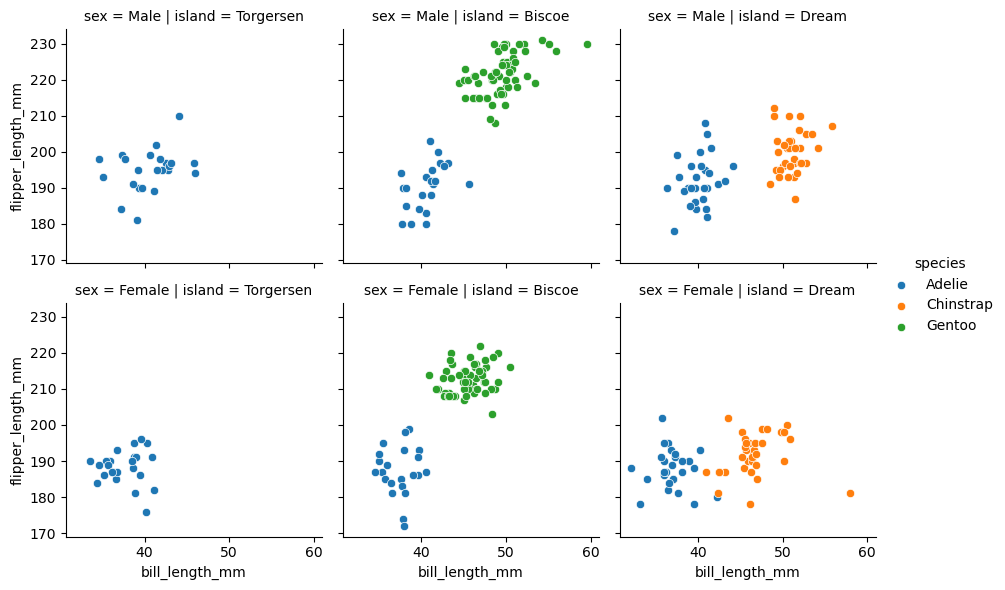

In [40]:
g = sns.FacetGrid(penguins, row="sex", col="island" , hue='species')
g.map(sns.scatterplot, "bill_length_mm", "flipper_length_mm")
g.add_legend()

C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


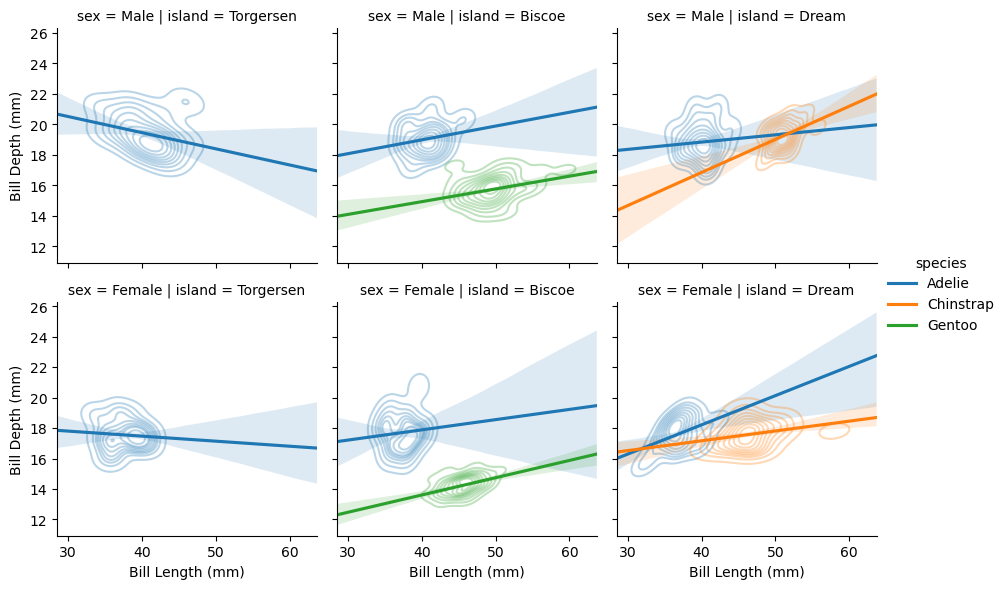

In [41]:
g = sns.FacetGrid(penguins, row="sex", col="island", hue="species")
g.map(sns.kdeplot, "bill_length_mm", "bill_depth_mm", alpha=0.3)
g.map(sns.regplot, "bill_length_mm", "bill_depth_mm", truncate=False, ci=80, scatter=False)
g.set_axis_labels("Bill Length (mm)", "Bill Depth (mm)")
g.add_legend()

# 6. Options for aesthetics

C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


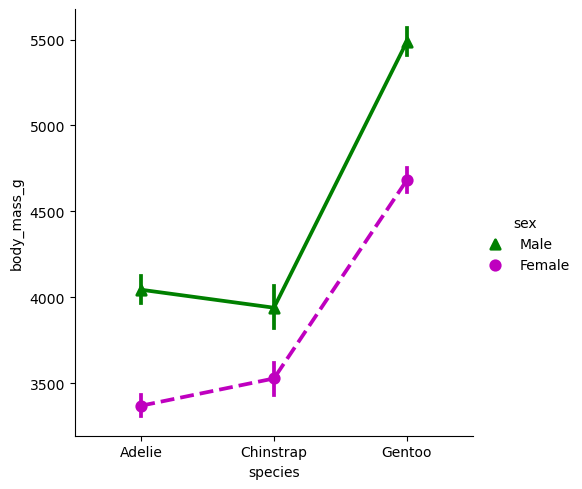

In [42]:
sns.catplot(x='species', y='body_mass_g', hue="sex", 
            palette={"Male": "g", "Female":"m"},
            markers=["^","o"],
            linestyles=["-","--"],
            data=penguins, kind='point')

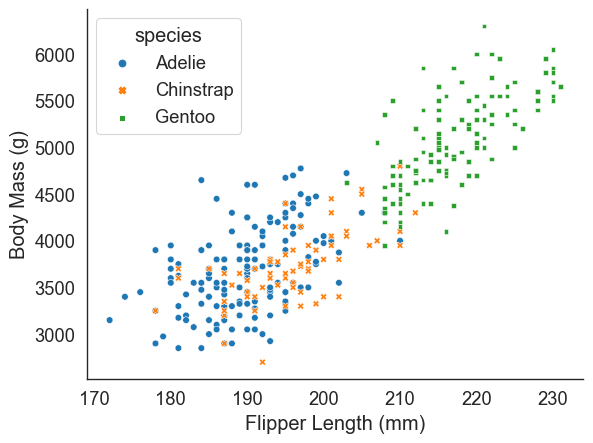

In [43]:
sns.set_style("white") 
sns.set_context("paper", font_scale=1.5) # 'paper' 'talk' 'poster'
scatter = sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=penguins, 
                          hue='species', style="species")
scatter.set(xlabel="Flipper Length (mm)", ylabel="Body Mass (g)")
sns.despine() # Removing axes spines

C:\Users\rupik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


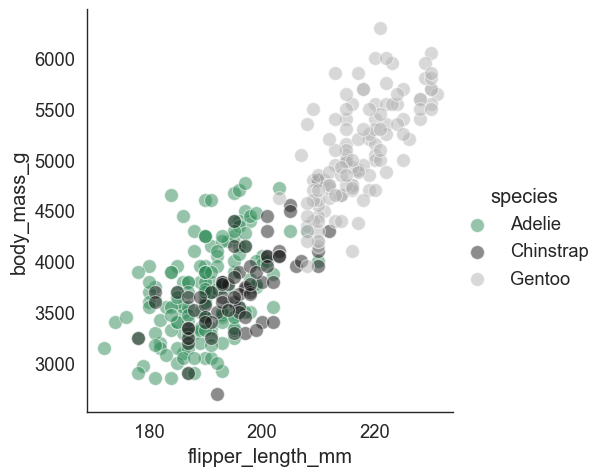

In [44]:
pal = dict(Adelie="seagreen", Gentoo=".7", Chinstrap=".1")
g = sns.FacetGrid(penguins, hue="species", palette=pal, height=5)
g.map(sns.scatterplot, "flipper_length_mm", "body_mass_g", s=100, alpha=.5)
g.add_legend()

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

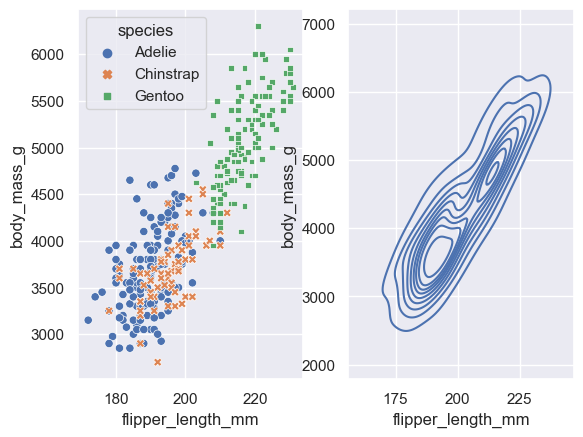

In [45]:
sns.set()
fig,axes = plt.subplots(1,2)

sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=penguins, hue='species', style="species", ax=axes[0])
sns.kdeplot(x='flipper_length_mm', y='body_mass_g', data=penguins, ax=axes[1])

<Axes: xlabel='island', ylabel='Count'>

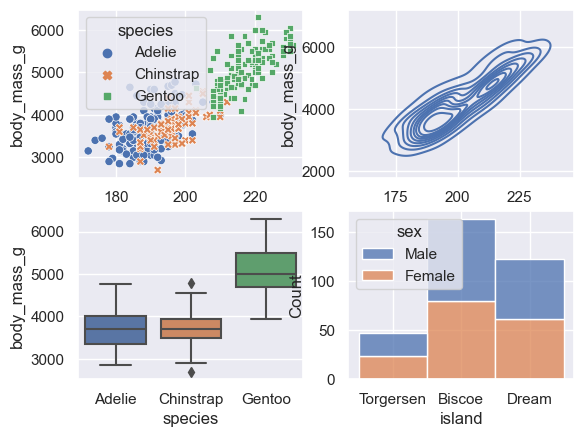

In [46]:
sns.set()
fig,axes = plt.subplots(2,2)

sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=penguins, hue='species', style="species", ax=axes[0, 0])
sns.kdeplot(x='flipper_length_mm', y='body_mass_g', data=penguins, ax=axes[0, 1])
sns.boxplot(x='species', y='body_mass_g', data=penguins, ax=axes[1, 0])
sns.histplot(x='island', discrete=True, data=penguins, ax=axes[1, 1], hue="sex", multiple="stack")